
# **Using Physicochemical Elements to Predict Wine Quality**

## **Introduction**

 Wine is a complex beverage composed of numerous compounds that contribute to its overall quality and taste. It is viewed as a luxury good and it is enjoyed by many consumers all over the world. The beverage's quality is most commonly assessed through both physicochemical properties and sensory tests (Mor et al.), we used this vital piece of information as the basis for our project. In this data science project, we will determine the most influential physicochemical compounds within wine to most accurately predict overall wine quality.  
 
 <center><img src="data/red and white wine.jpeg"></center>


 Through data analysis, we hope to find predictive relationships in certain compounds that make up wine in hopes of answering our project’s primary question: 
 **How accurately can we predict the quality of wine with the most relevant physicochemical elements using the K-nearest neighbors classification algorithm?**

 We will use a 2009 “Wine Quality” dataset from Portugal which has two dataframes for red wine and white wine. We chose to build our model for predicting ren wine only, as it is the more commonly consumed wine. The data displays several different red wines based on physicochemical tests and their quality from sensory data as a score between 0 and 10. Portugal is one of the top 10 countries that export wine, for which the wine industry is investing in technologies for winemaking and selling. For this dataset, wine certification and quality assessment are key elements. 
 
 These are the columns of the dataset.
 
* 1 - fixed acidity (g(tartaric acid)/dm3)
* 2 - volatile acidity (g(acetic acid)/dm3)
* 3 - citric acid (g/dm3)
* 4 - residual sugar (g/dm3)
* 5 - chlorides (g(sodium chloride)/dm3)
* 6 - free sulfur dioxide (mg/dm3)
* 7 - total sulfur dioxide (mg/dm3)
* 8 - density (g/cm3)
* 9 - pH
* 10 - sulphates (g(potassium sulphate)/dm3)
* 11 - alcohol (vol.%)

 Output variable (based on sensory data): 
* 12 - quality (score between 0 and 10)


Through comparing relationships between top relevant variables (backed up with research) using visualizations, we will pick the predictors which correlate with quality the most in order to achieve the highest prediction accuracy.


## **Methods and Results**

overall methods

In [37]:
#Loading the relevant libraries

library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(GGally)


### Loading and Wrangling

In [2]:
wine_data <- read_csv2("https://raw.githubusercontent.com/choialice707/DSCI-100-Group56-Proj/main/winequality-red.csv") |>
    mutate(quality = as_factor(quality)) |>
    filter(alcohol < 150) |>
        mutate(`volatile acidity` = as.numeric(`volatile acidity`),
                `citric acid` = as.numeric(`citric acid`),
                chlorides = as.numeric(chlorides),
                density = as.numeric(density),
                sulphates = as.numeric(sulphates)) |>
na.omit()
head(wine_data)
tail(wine_data)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,98,6
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
74,0.66,0.00,18,0.075,13,40,0.9978,351,0.56,94,5


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
68,0.620,0.08,19,0.068,28,38,0.99651,342,0.82,95,6
62,0.600,0.08,2,0.090,32,44,0.99490,345,0.58,105,5
59,0.550,0.10,22,0.062,39,51,0.99512,352,0.76,112,6
63,0.510,0.13,23,0.076,29,40,0.99574,342,0.75,11,6
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5
6,0.310,0.47,36,0.067,18,42,0.99549,339,0.66,11,6


 The first step in our data analysis, after loading the necessary packgages, was to read the "wine quality" dataset imported onto Jupyter. We then filtered the alcohol variable to be less than 150 to remove any outliers that would otherwise skew the visualization to be clustered in one line. This allowed us to better compare the variables. Finally, we mutated each of the variables with as.numeric to convert the character vectors into a numeric vector, so that the axis numbers are more easily readable.

In [3]:
wine_data_scaled <- wine_data |> 
 mutate(scaled_fixed_acidity = scale(`fixed acidity`, center = TRUE), 
        scaled_volatile_acidity = scale(`volatile acidity`, center = TRUE),
        scaled_citric_acid = scale(`citric acid`, center = TRUE),
        scaled_chlorides = scale(chlorides, center = TRUE),
        scaled_free_sulfur_dioxide = scale(`free sulfur dioxide`, center = TRUE),
        scaled_total_sulfur_dioxide = scale(`total sulfur dioxide`, center = TRUE),
        scaled_density = scale(density, center = TRUE),
        scaled_pH = scale(pH, center = TRUE),
        scaled_sulphates = scale(sulphates, center = TRUE),
        scaled_alcohol = scale(alcohol, center = TRUE))

head(wine_data_scaled)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,⋯,scaled_fixed_acidity,scaled_volatile_acidity,scaled_citric_acid,scaled_chlorides,scaled_free_sulfur_dioxide,scaled_total_sulfur_dioxide,scaled_density,scaled_pH,scaled_sulphates,scaled_alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,⋯,-0.03735178,0.9687486,-1.397805,-0.24503376,-0.28891384,-0.3777876,0.55351248,0.5595655,-0.5806931,0.03831227
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,⋯,0.10267314,1.9739442,-1.397805,0.22032447,0.44246845,0.6250486,0.02306861,-2.7672005,0.1255130,0.16366905
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,⋯,0.10267314,1.3038138,-1.192587,0.09340859,-0.07994747,0.2299919,0.12915738,0.2988472,-0.0510385,0.16366905
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,⋯,1.29288497,-1.3767078,1.475248,-0.26618641,0.02453572,0.4123258,0.65960125,0.1945598,-0.4629921,0.16366905
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,⋯,-0.03735178,0.9687486,-1.397805,-0.24503376,-0.28891384,-0.3777876,0.55351248,0.5595655,-0.5806931,0.03831227
74,0.66,0.00,18,0.075,13,40,0.9978,351,0.56,⋯,-0.03735178,0.7453718,-1.397805,-0.26618641,-0.18443065,-0.1954537,0.55351248,0.5595655,-0.5806931,0.03831227


 Here the data used was scaled to ensure clear visualizations and facilitate effective comparison of variables since the distances between the points would have otherwise have different significances for the y and x axis . Scaling was performed using standardization, which standardized the range and distribution of the physicochemical elements. This process allowed for a fair and meaningful visual analysis, ensuring that variables with different scales did not dominate the visualizations. As a result, scaling the data improved the clarity and interpretability of the visual comparisons, aiding in the assessment of relationships between the physicochemical elements and wine quality.

### Splitting the Data

In [40]:
set.seed(1234) #We used the seed to be able to reproduce the results

wine_split <- initial_split(wine_data_scaled, prop = 0.75 , strata = quality)  
wine_train <- training(wine_split)   
wine_test <- testing(wine_split)

head(wine_train)
head(wine_test)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,⋯,scaled_fixed_acidity,scaled_volatile_acidity,scaled_citric_acid,scaled_chlorides,scaled_free_sulfur_dioxide,scaled_total_sulfur_dioxide,scaled_density,scaled_pH,scaled_sulphates,scaled_alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
74,0.700,0.00,19,0.076,11,34,0.9978,351,0.56,⋯,-0.03735178,0.9687486,-1.3978049,-0.24503376,-0.28891384,-0.3777876,0.55351248,0.5595655,-0.5806931,0.03831227
78,0.880,0.00,26,0.098,25,67,0.9968,32,0.68,⋯,0.10267314,1.9739442,-1.3978049,0.22032447,0.44246845,0.6250486,0.02306861,-2.7672005,0.1255130,0.16366905
78,0.760,0.04,23,0.092,15,54,0.9970,326,0.65,⋯,0.10267314,1.3038138,-1.1925868,0.09340859,-0.07994747,0.2299919,0.12915738,0.2988472,-0.0510385,0.16366905
74,0.700,0.00,19,0.076,11,34,0.9978,351,0.56,⋯,-0.03735178,0.9687486,-1.3978049,-0.24503376,-0.28891384,-0.3777876,0.55351248,0.5595655,-0.5806931,0.03831227
67,0.580,0.08,18,0.097,15,65,0.9959,328,0.54,⋯,-0.28239539,0.2986182,-0.9873687,0.19917183,-0.07994747,0.5642707,-0.45433088,0.3197046,-0.6983941,-0.02436613
56,0.615,0.00,16,0.089,16,59,0.9943,358,0.52,⋯,-0.66746392,0.4940729,-1.3978049,0.02995065,-0.02770588,0.3819368,-1.30304107,0.6325666,-0.8160951,0.19500824


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,⋯,scaled_fixed_acidity,scaled_volatile_acidity,scaled_citric_acid,scaled_chlorides,scaled_free_sulfur_dioxide,scaled_total_sulfur_dioxide,scaled_density,scaled_pH,scaled_sulphates,scaled_alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,⋯,1.29288497,-1.3767078,1.4752481,-0.2661864,0.02453572,0.4123258,0.65960125,0.1945598,-0.4629921,0.16366905
74,0.66,0.00,18,0.075,13,40,0.9978,351,0.56,⋯,-0.03735178,0.7453718,-1.3978049,-0.2661864,-0.18443065,-0.1954537,0.55351248,0.5595655,-0.5806931,0.03831227
79,0.60,0.06,16,0.069,15,59,0.9964,33,0.46,⋯,0.13767937,0.4103066,-1.0899778,-0.3931023,-0.07994747,0.3819368,-0.18910894,-2.7567718,-1.1691982,0.03831227
78,0.58,0.02,2,0.073,9,18,0.9968,336,0.57,⋯,0.10267314,0.2986182,-1.2951959,-0.3084917,-0.39339702,-0.8640112,0.02306861,0.4031345,-0.5218426,0.06965146
75,0.50,0.36,61,0.071,17,102,0.9978,335,0.80,⋯,-0.00234555,-0.1481354,0.4491578,-0.3507970,0.02453572,1.6886628,0.55351248,0.3927058,0.8317192,0.38304341
75,0.50,0.36,61,0.071,17,102,0.9978,335,0.80,⋯,-0.00234555,-0.1481354,0.4491578,-0.3507970,0.02453572,1.6886628,0.55351248,0.3927058,0.8317192,0.38304341


### Preliminary Summary

In [5]:
wine_summary <- wine_train |>
    group_by(quality) |>
    summarize(count_per_quality = n()) 

wine_summary

quality,count_per_quality
<fct>,<int>
3,7
4,38
5,509
6,469
7,150
8,13


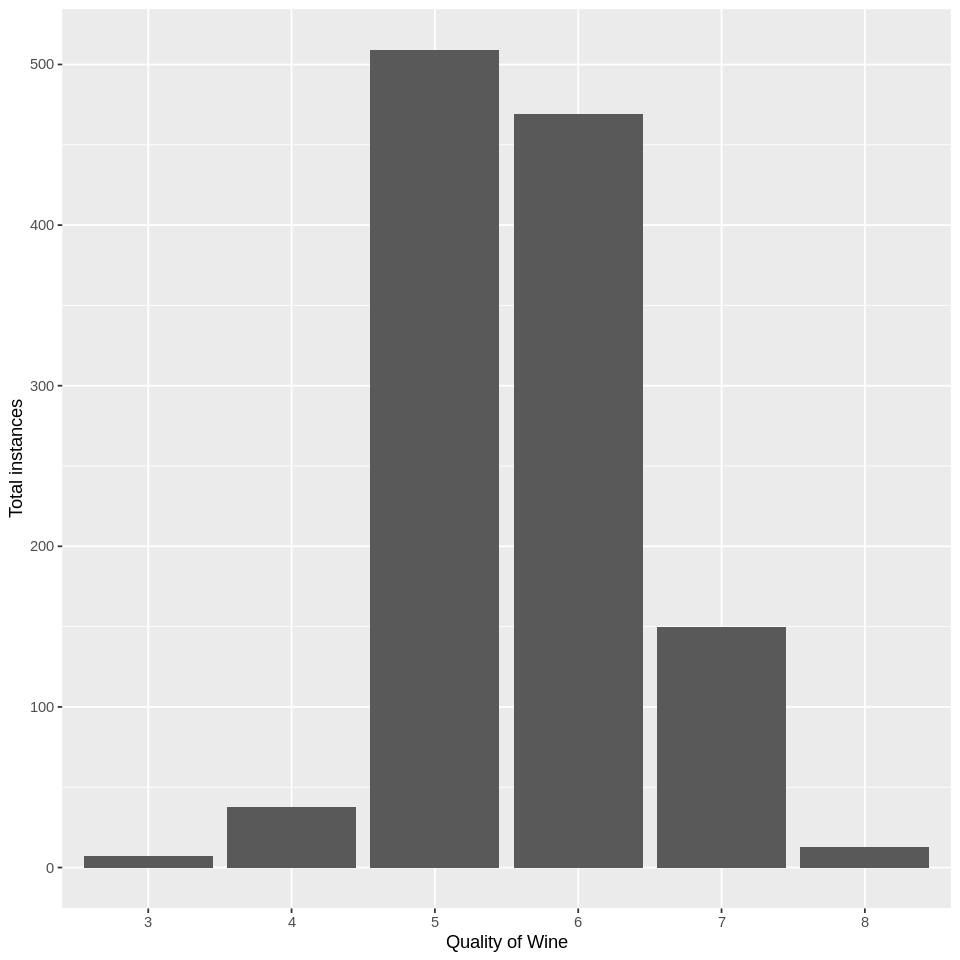

In [6]:
options(repr.plot.width = 8, repr.plot.height = 8) 

wine_summary_plot <- wine_summary |>
    ggplot(aes(x = quality, y = count_per_quality)) +
    geom_bar(stat = "identity") +
    labs(x = "Quality of Wine", y = "Total instances")
    
wine_summary_plot

Talk ab total wine counts, Talk ab distribution, how it's mostly 5-6 and how this is unbalanced and what we would do, but that it is not working in this case and will discuss further in the discussion.

### Preliminary Visualization for Selecting Predictors


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




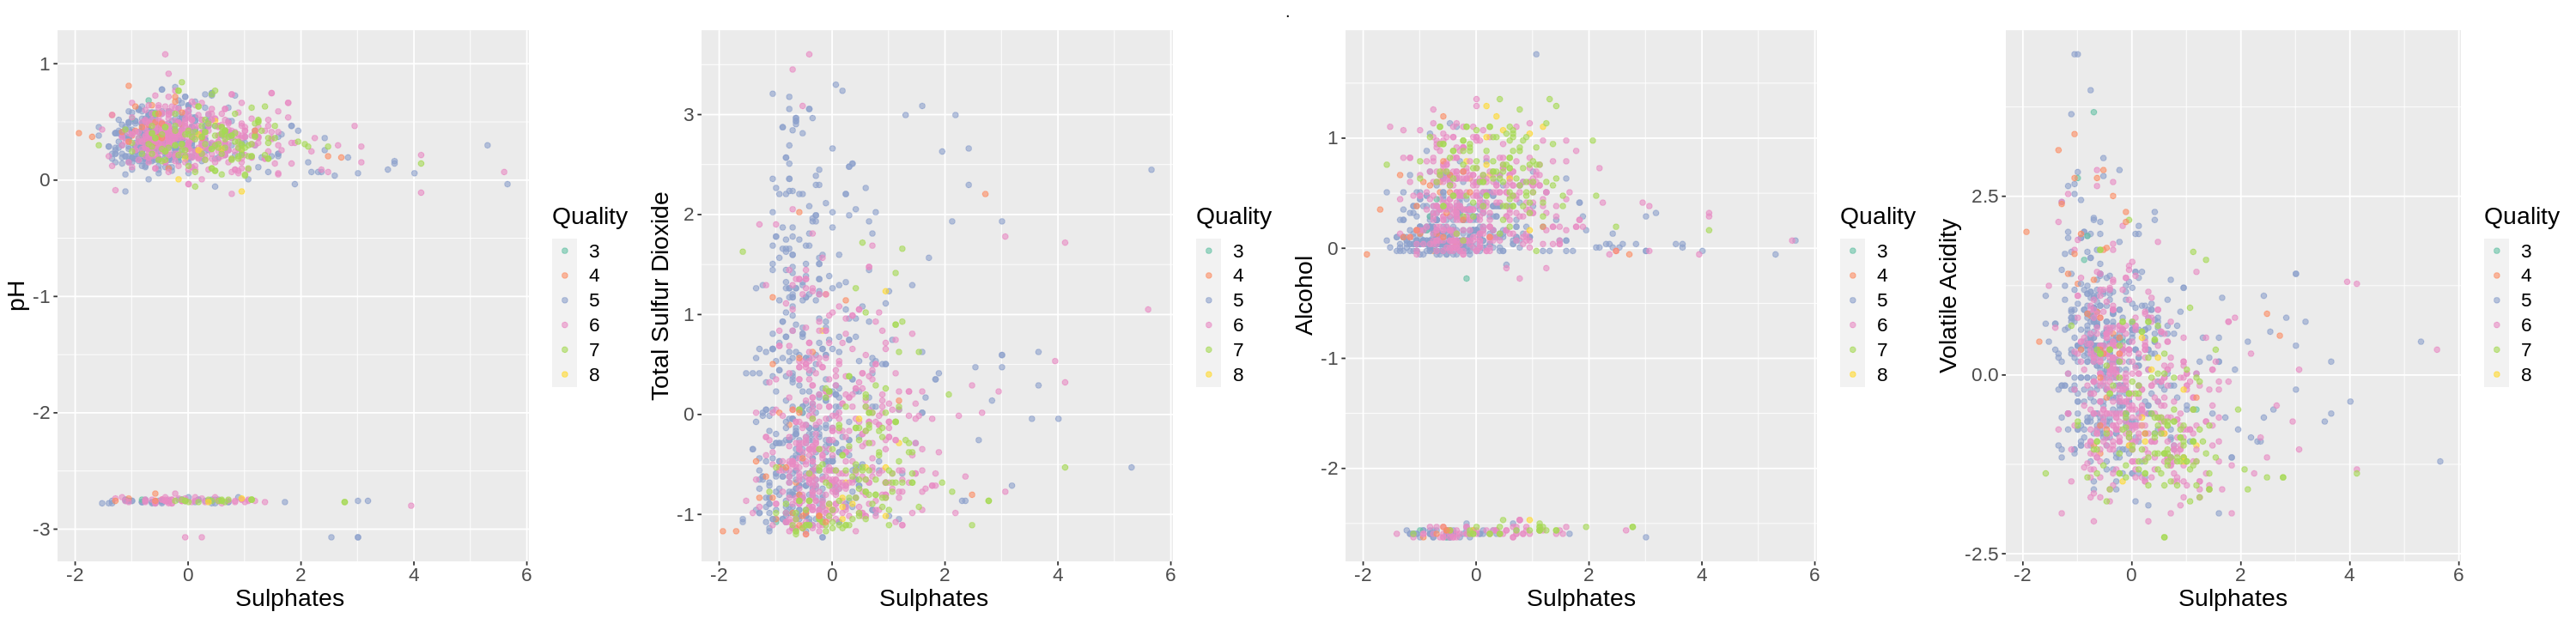

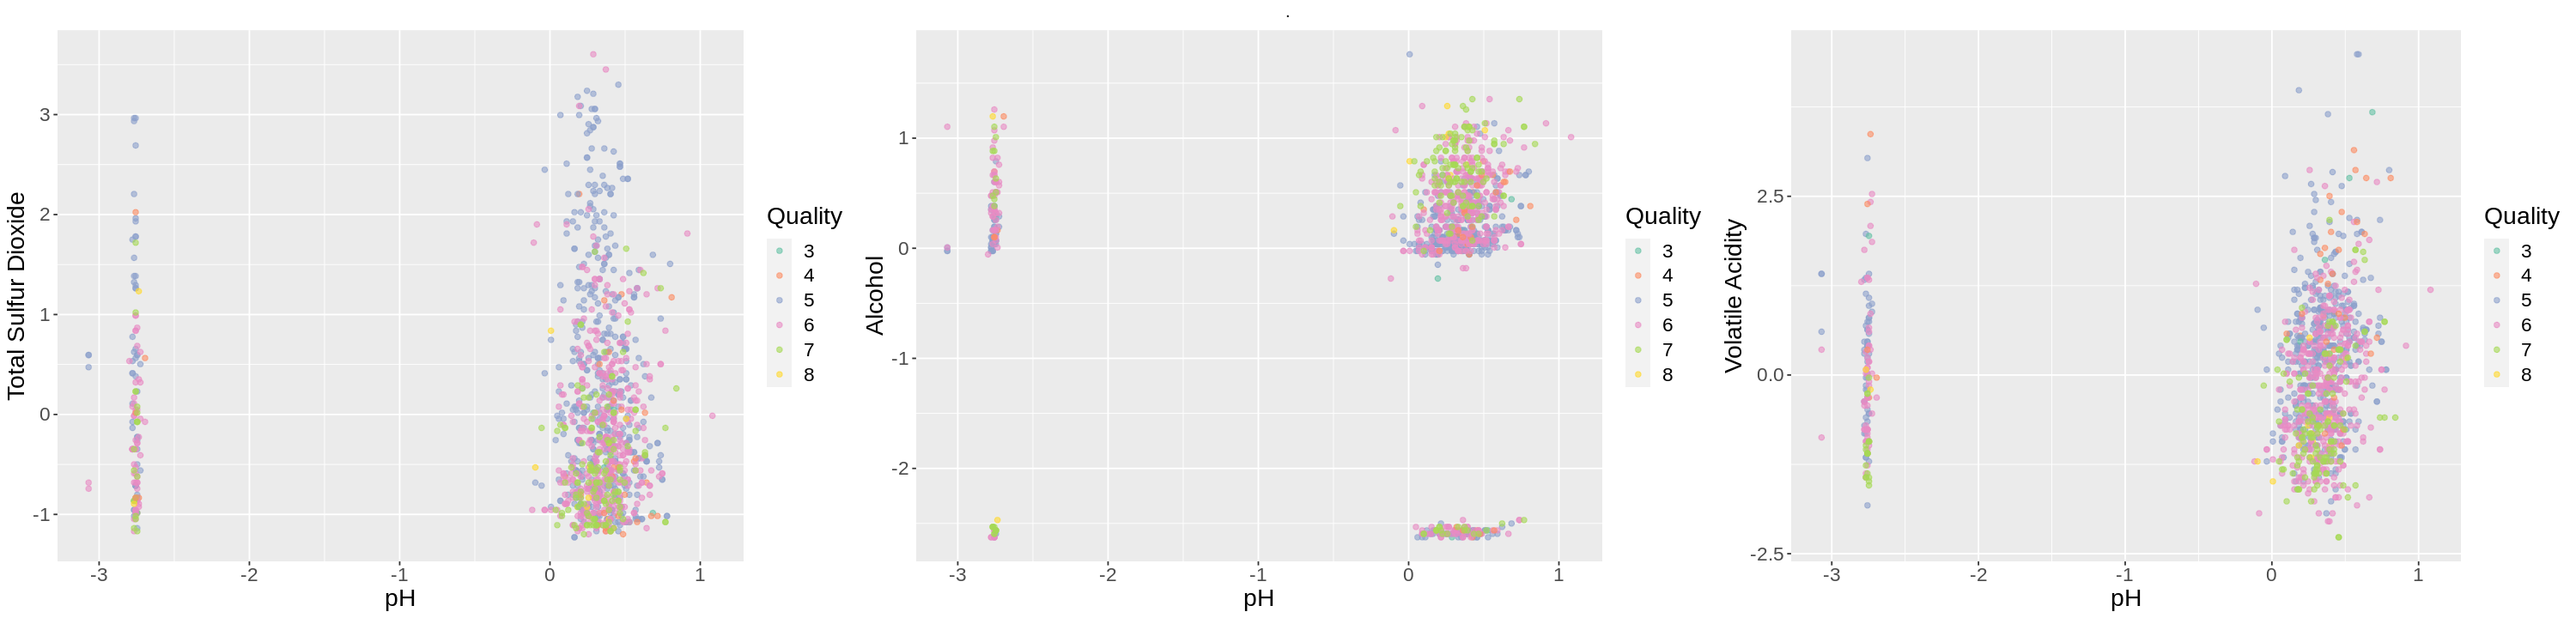

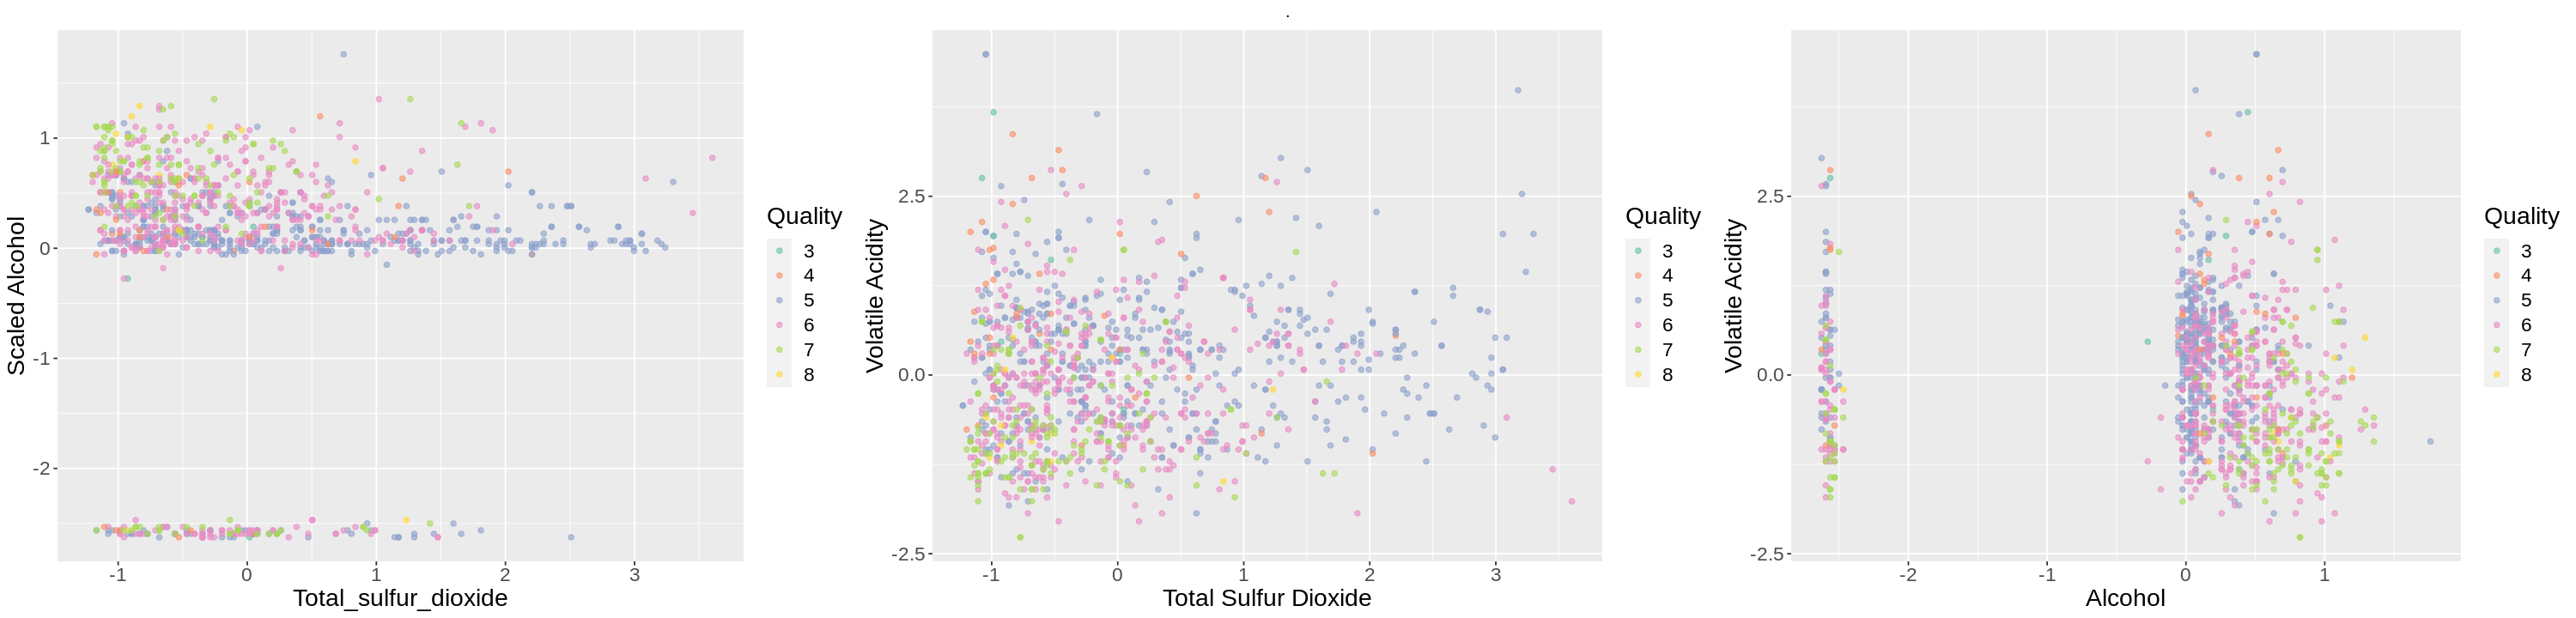

In [7]:
library(gridExtra)
options(repr.plot.width = 25, repr.plot.height = 6) 

wine_plot1 <- wine_train |>
  ggplot(aes(x = scaled_sulphates, y = scaled_pH, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Sulphates ", 
       y = "pH",
       color = "Quality") +
  theme(text = element_text(size = 17))+
scale_color_brewer(palette = "Set2")

wine_plot2 <- wine_train |>
  ggplot(aes(x = scaled_sulphates, y = scaled_total_sulfur_dioxide, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Sulphates ", 
       y = "Total Sulfur Dioxide",
       color = "Quality") +
  theme(text = element_text(size = 17))+
scale_color_brewer(palette = "Set2")

wine_plot3 <- wine_train |>
  ggplot(aes(x = scaled_sulphates, y = scaled_alcohol, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Sulphates", 
       y = "Alcohol",
       color = "Quality") +
  theme(text = element_text(size = 17))+
scale_color_brewer(palette = "Set2")

wine_plot4 <- wine_train |>
  ggplot(aes(x = scaled_sulphates, y = scaled_volatile_acidity, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Sulphates", 
       y = "Volatile Acidity",
       color = "Quality") +
  theme(text = element_text(size = 17))+
scale_color_brewer(palette = "Set2")

#############


wine_plot5 <- wine_train |>
  ggplot(aes(x = scaled_pH, y = scaled_total_sulfur_dioxide, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "pH", 
       y = "Total Sulfur Dioxide",
       color = "Quality") +
  theme(text = element_text(size = 17))+
scale_color_brewer(palette = "Set2")

wine_plot6 <- wine_train |>
  ggplot(aes(x = scaled_pH, y = scaled_alcohol, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "pH", 
       y = "Alcohol",
       color = "Quality") +
  theme(text = element_text(size = 17))+
scale_color_brewer(palette = "Set2")

wine_plot7 <- wine_train |>
  ggplot(aes(x = scaled_pH, y = scaled_volatile_acidity, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "pH", 
       y = "Volatile Acidity",
       color = "Quality") +
  theme(text = element_text(size = 17))+
scale_color_brewer(palette = "Set2")

#########


wine_plot8 <- wine_train |>
  ggplot(aes(x = scaled_total_sulfur_dioxide, y = scaled_alcohol, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Total_sulfur_dioxide", 
       y = "Scaled Alcohol",
       color = "Quality") +
  theme(text = element_text(size = 17))+
scale_color_brewer(palette = "Set2")

wine_plot9 <- wine_train |>
  ggplot(aes(x = scaled_total_sulfur_dioxide, y = scaled_volatile_acidity, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Total Sulfur Dioxide", 
       y = "Volatile Acidity",
       color = "Quality") +
  theme(text = element_text(size = 17))+
scale_color_brewer(palette = "Set2")

##########


wine_plot10 <- wine_train |>
  ggplot(aes(x = scaled_alcohol, y = scaled_volatile_acidity, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Alcohol", 
       y = "Volatile Acidity",
       color = "Quality") +
  theme(text = element_text(size = 17))+
scale_color_brewer(palette = "Set2")



grid.arrange(wine_plot1, wine_plot2, wine_plot3, wine_plot4, nrow = 1, top = '.')
grid.arrange(wine_plot5, wine_plot6, wine_plot7, nrow = 1, top = '.')
grid.arrange(wine_plot8, wine_plot9, wine_plot10, nrow = 1, top = '.')

     

 To determine the variables to include, we referred to a research paper by Cortez et al. as a valuable source of information. According to the findings presented in the paper, the top five relevant variables for predicting wine quality were sulphates, pH, total sulfur dioxide, alcohol, and volatile acidity. We conducted a comparative analysis among these five elements to validate and select the most suitable variables for our prediction model.

 By examining the relationships and patterns between these variables, we aimed to identify which ones exhibited the strongest correlations and clear distributions with wine quality. This was done by visually examining the patterns and trends through plotting each variable against each other. We then assessed the strength of the relationships, selecting the variables with the highest correlations as the most relevant for our model.

 Upon analyzing the results of our comparison, we determined that sulphates, sulfur dioxide, pH values, and alcohol displayed the most consistent and significant associations with wine quality. Therefore, these variables were selected as the most appropriate for inclusion in our prediction model using the KNN classification algorithm.

### Data analysis: Building and Training the Classifier Model

In [8]:
set.seed(1234)

wine_recipe <- recipe(quality ~ scaled_sulphates + scaled_pH + scaled_total_sulfur_dioxide + scaled_alcohol, data = wine_train)
wine_recipe

wine_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")
wine_tune


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [11]:
set.seed(1234)

wine_vfold <- vfold_cv(wine_train, v = 5, strata = quality)

In [10]:
set.seed(1234)

k_vals <- tibble(neighbors = seq(2, 10, 1))

wine_results <- workflow() |>
      add_recipe(wine_recipe) |>
      add_model(wine_tune) |>
      tune_grid(resamples = wine_vfold, grid = k_vals) |>
      collect_metrics()
wine_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.5852952,5,0.01538538,Preprocessor1_Model1
2,roc_auc,hand_till,0.6046932,5,0.01129787,Preprocessor1_Model1
3,accuracy,multiclass,0.5945281,5,0.01732579,Preprocessor1_Model2
3,roc_auc,hand_till,0.6153429,5,0.01101551,Preprocessor1_Model2
4,accuracy,multiclass,0.5911347,5,0.01201820,Preprocessor1_Model3
4,roc_auc,hand_till,0.6287171,5,0.01765782,Preprocessor1_Model3
5,accuracy,multiclass,0.5886459,5,0.01765155,Preprocessor1_Model4
5,roc_auc,hand_till,0.6233630,5,0.01714496,Preprocessor1_Model4
6,accuracy,multiclass,0.5996237,5,0.01932534,Preprocessor1_Model5


In [27]:
set.seed(1234)

wine_accuracies <- wine_results |>
    filter(.metric == "accuracy")
wine_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.5852952,5,0.01538538,Preprocessor1_Model1
3,accuracy,multiclass,0.5945281,5,0.01732579,Preprocessor1_Model2
4,accuracy,multiclass,0.5911347,5,0.01201820,Preprocessor1_Model3
5,accuracy,multiclass,0.5886459,5,0.01765155,Preprocessor1_Model4
6,accuracy,multiclass,0.5996237,5,0.01932534,Preprocessor1_Model5
7,accuracy,multiclass,0.5971064,5,0.02059025,Preprocessor1_Model6
8,accuracy,multiclass,0.5979432,5,0.02072053,Preprocessor1_Model7
9,accuracy,multiclass,0.5979291,5,0.02092264,Preprocessor1_Model8
10,accuracy,multiclass,0.5944962,5,0.01996198,Preprocessor1_Model9


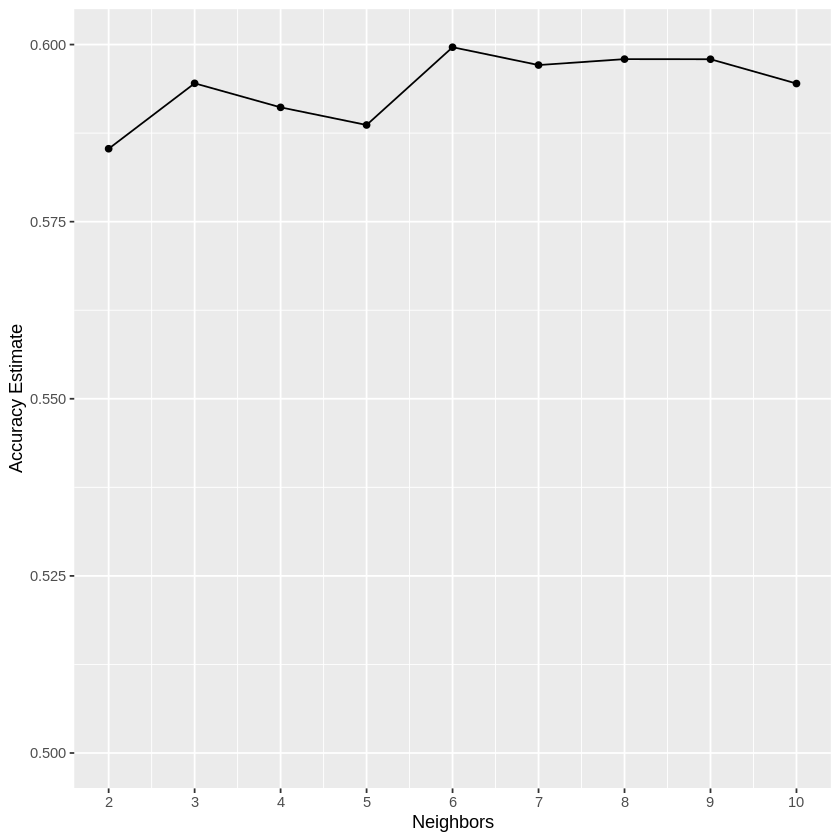

In [34]:
set.seed(1234)

options(repr.plot.width = 7, repr.plot.height = 7) 

accuracy_vs_k_plot <- wine_accuracies |>
    ggplot(aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 10, by = 1)) +  # adjusting the x-axis
    scale_y_continuous(limits = c(0.5, 0.6)) # adjusting the y-axis

accuracy_vs_k_plot

In [29]:
set.seed(1234)

choice_of_k <- wine_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)
choice_of_k

[1] 6

In [30]:
set.seed(1234) 

wine_recipe_2 <- recipe(quality ~ scaled_sulphates + scaled_pH + scaled_total_sulfur_dioxide + scaled_alcohol, data = wine_train)
wine_recipe_2

wine_spec <-  nearest_neighbor(weight_func = "rectangular", neighbors = choice_of_k)|>
    set_engine("kknn") |>
     set_mode("classification")

wine_spec



Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = choice_of_k
  weight_func = rectangular

Computational engine: kknn 


In [31]:
set.seed(1234)

wine_fit <- workflow() |>
add_recipe(wine_recipe_2) |>
add_model(wine_spec) |>
fit(data = wine_train)

wine_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(6,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4013491
Best kernel: rectangular
Best k: 6

In [32]:
set.seed(1234)

wine_predictions <- predict(wine_fit, wine_test) |>
bind_cols(wine_test)
head(wine_predictions)
wine_metrics <- wine_predictions |>
        metrics(truth = quality, estimate = .pred_class) |> 
filter(.metric == "accuracy")
wine_metrics

wine_conf_mat <- wine_predictions |> 
       conf_mat(truth = quality, estimate = .pred_class)

wine_conf_mat

.pred_class,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,⋯,scaled_fixed_acidity,scaled_volatile_acidity,scaled_citric_acid,scaled_chlorides,scaled_free_sulfur_dioxide,scaled_total_sulfur_dioxide,scaled_density,scaled_pH,scaled_sulphates,scaled_alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
6,112,0.28,0.56,19,0.075,17,60,0.9980,316,⋯,1.29288497,-1.3767078,1.4752481,-0.2661864,0.02453572,0.4123258,0.65960125,0.1945598,-0.4629921,0.16366905
5,74,0.66,0.00,18,0.075,13,40,0.9978,351,⋯,-0.03735178,0.7453718,-1.3978049,-0.2661864,-0.18443065,-0.1954537,0.55351248,0.5595655,-0.5806931,0.03831227
5,79,0.60,0.06,16,0.069,15,59,0.9964,33,⋯,0.13767937,0.4103066,-1.0899778,-0.3931023,-0.07994747,0.3819368,-0.18910894,-2.7567718,-1.1691982,0.03831227
5,78,0.58,0.02,2,0.073,9,18,0.9968,336,⋯,0.10267314,0.2986182,-1.2951959,-0.3084917,-0.39339702,-0.8640112,0.02306861,0.4031345,-0.5218426,0.06965146
5,75,0.50,0.36,61,0.071,17,102,0.9978,335,⋯,-0.00234555,-0.1481354,0.4491578,-0.3507970,0.02453572,1.6886628,0.55351248,0.3927058,0.8317192,0.38304341
5,75,0.50,0.36,61,0.071,17,102,0.9978,335,⋯,-0.00234555,-0.1481354,0.4491578,-0.3507970,0.02453572,1.6886628,0.55351248,0.3927058,0.8317192,0.38304341


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6085859


          Truth
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   1   1   0   0
         5   2   7 122  45   9   0
         6   0   7  40  99  18   4
         7   0   0   5  15  20   1
         8   0   0   0   0   0   0

### Analysis Visualization

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



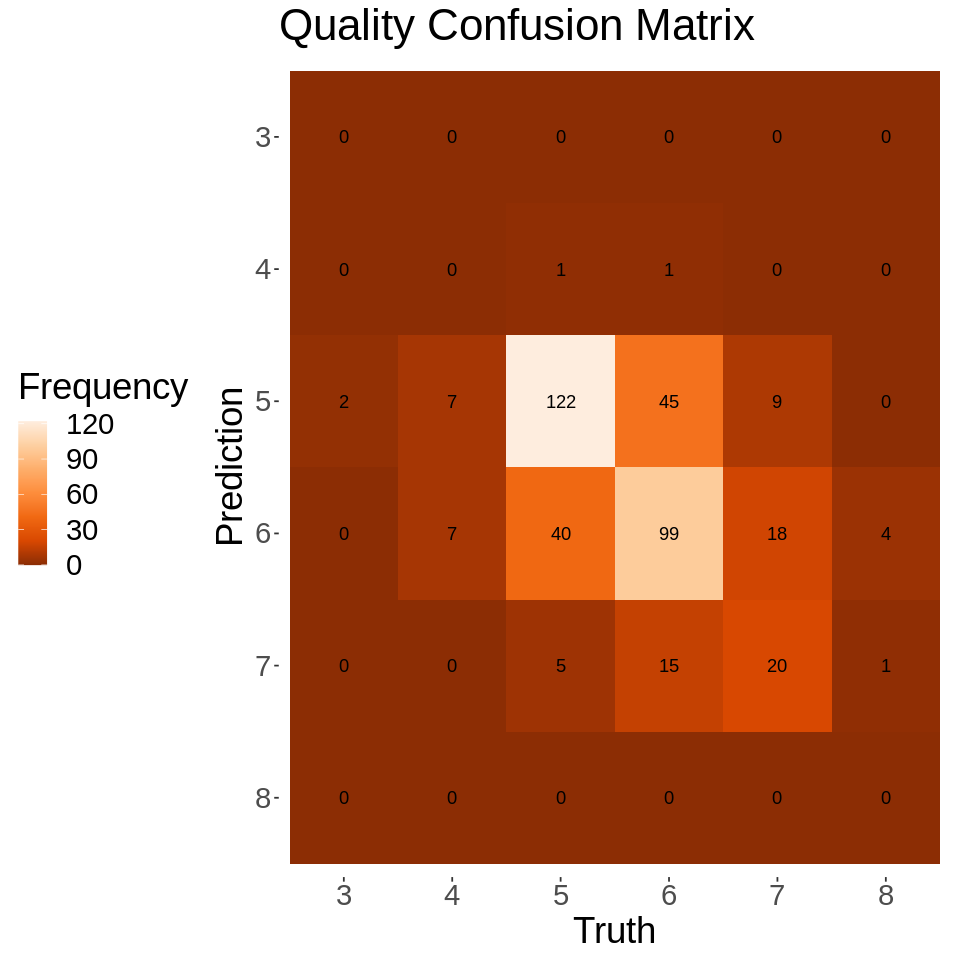

In [41]:
options(repr.plot.width = 8, repr.plot.height = 8) 

autoplot(wine_conf_mat, type = "heatmap") +
    scale_fill_distiller(palette = "Oranges", name = "Frequency") + 
    labs(title = "Quality Confusion Matrix") +
    theme(legend.position = "left", text = element_text(size = 22),
          plot.caption = element_text(size = 15, hjust = 0))

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,⋯,scaled_volatile_acidity,scaled_citric_acid,scaled_chlorides,scaled_free_sulfur_dioxide,scaled_total_sulfur_dioxide,scaled_density,scaled_pH,scaled_sulphates,scaled_alcohol,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<chr>
74,0.700,0.00,19,0.076,11,34,0.9978,351,0.56,⋯,0.9687486,-1.3978049,-0.24503376,-0.28891384,-0.3777876,0.55351248,0.5595655,-0.5806931,0.03831227,training
78,0.880,0.00,26,0.098,25,67,0.9968,32,0.68,⋯,1.9739442,-1.3978049,0.22032447,0.44246845,0.6250486,0.02306861,-2.7672005,0.1255130,0.16366905,training
78,0.760,0.04,23,0.092,15,54,0.9970,326,0.65,⋯,1.3038138,-1.1925868,0.09340859,-0.07994747,0.2299919,0.12915738,0.2988472,-0.0510385,0.16366905,training
74,0.700,0.00,19,0.076,11,34,0.9978,351,0.56,⋯,0.9687486,-1.3978049,-0.24503376,-0.28891384,-0.3777876,0.55351248,0.5595655,-0.5806931,0.03831227,training
67,0.580,0.08,18,0.097,15,65,0.9959,328,0.54,⋯,0.2986182,-0.9873687,0.19917183,-0.07994747,0.5642707,-0.45433088,0.3197046,-0.6983941,-0.02436613,training
56,0.615,0.00,16,0.089,16,59,0.9943,358,0.52,⋯,0.4940729,-1.3978049,0.02995065,-0.02770588,0.3819368,-1.30304107,0.6325666,-0.8160951,0.19500824,training


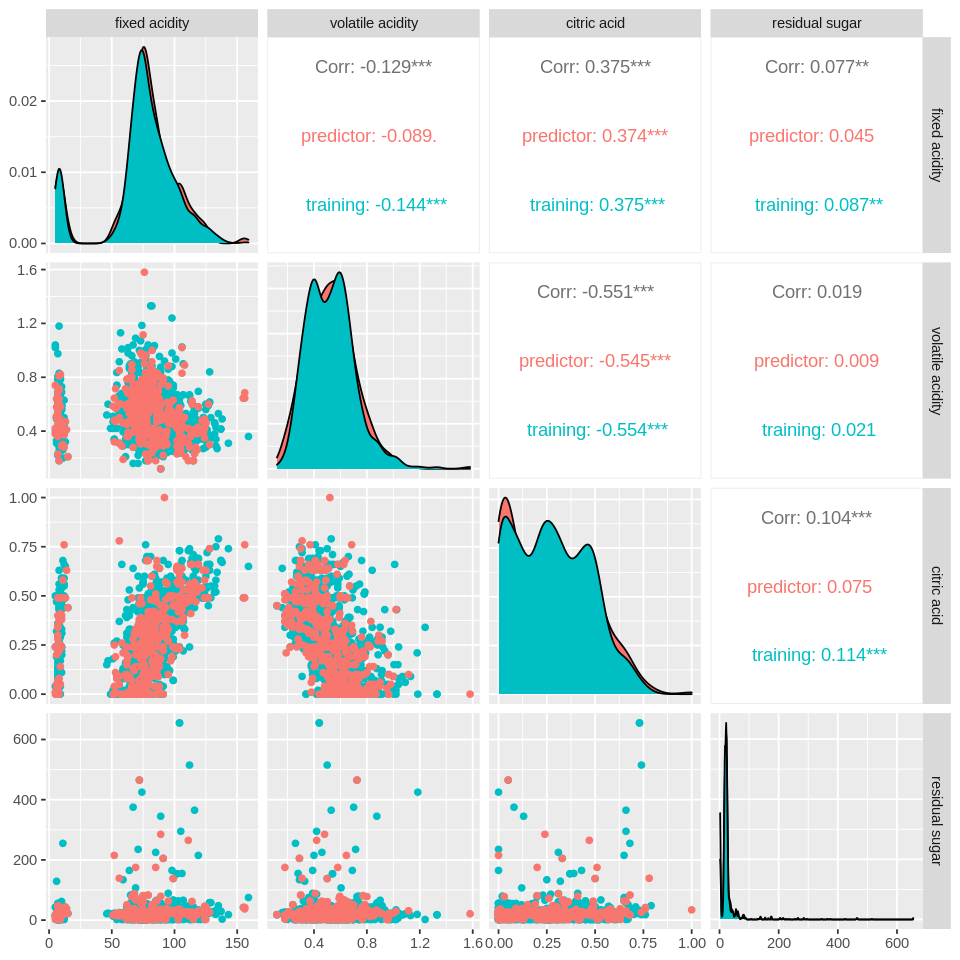

In [42]:
options(repr.plot.width = 8, repr.plot.height = 8) 

data <- wine_train %>%
mutate(type = "training") 

data2 <- wine_test %>%
mutate(type = "predictor")
combined <- rbind(data, data2)
head(combined)

ggpairs(combined, aes(colour = type), columns = 1:4)

## **Discussion**

Include that we tried to balance the data because it was imbalanced (for example there were only 10 of quality 3 and ~600 for 5 and 6) but the themis package wouldnt load. In order  to improve our accuracy we would do the balancing step with the step_upsample function. and also forward selection instead of eyeballing the visualizations.

## **References**

Literature sources:

* Cortez, Paulo, et al. "Modeling wine preferences by data mining from physicochemical properties." Decision Support Systems, ScienceDirect, May 2009, https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377.
 
*  Mor, Nuriel Shalom, et al. "Wine Quality and Type Prediction from Physicochemical Properties Using Neural Networks for Machine Learning: A Free Software for Winemakers and Customers." Journal of Wine Research, Taylor & Francis Online, 2019, https://www.tandfonline.com/doi/full/10.1080/09571264.2019.1590937.

Data source: 

* 